### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
def ignore(*args, **kwargs):
    """ ignore annoying warnings """
    pass
warnings.warn = ignore

In [ ]:
train = pd.read_csv('train_revised.csv')
test = pd.read_csv('test_questions.csv')

In [ ]:
train.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49

In [ ]:
test.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  
0            49  
1            11  
2            11  
3            11  
4            11

In [ ]:
train, test = train.drop_duplicates(), test.drop_duplicates()

In [ ]:
#adding the number of tickets column
count1 = dict(train.ride_id.value_counts())
train['number_of_tickets'] = train['ride_id'].map(count1)

In [ ]:
#storing the ride_id columns
train_id = train['ride_id']
test_id = test['ride_id']

In [ ]:
#dropping the ride_id columns
train.drop('ride_id', axis=1, inplace=True)
test.drop('ride_id', axis=1, inplace=True)

In [ ]:
train.drop(['seat_number', 'payment_method', 'payment_receipt'], axis=1, inplace=True)

In [ ]:
#casting travel_date to datetime
train.travel_date = pd.to_datetime(train.travel_date)
test.travel_date = pd.to_datetime(test.travel_date)

In [ ]:
"""splitting the travel date to month and day"""
train['year'], test['year'] = train.travel_date.dt.year, test.travel_date.dt.year
#train['month'], test['month'] = train.travel_date.dt.month, test.travel_date.dt.month
train['day'], test['day'] = train.travel_date.dt.dayofyear, test.travel_date.dt.dayofyear
train['hour'], test['hour'] = train.travel_time.map(lambda x: pd.to_datetime(x).hour), test.travel_time.map(lambda x: pd.to_datetime(x).hour)

In [ ]:
train.head()

travel_date travel_time travel_from travel_to car_type  max_capacity  \
0  2017-10-17        7:15      Migori   Nairobi      Bus            49   
1  2017-11-19        7:12      Migori   Nairobi      Bus            49   
2  2017-11-26        7:05      Keroka   Nairobi      Bus            49   
3  2017-11-27        7:10    Homa Bay   Nairobi      Bus            49   
4  2017-11-27        7:12      Migori   Nairobi      Bus            49   

   number_of_tickets  year  day  hour  
0                  1  2017  290     7  
1                  1  2017  323     7  
2                  1  2017  330     7  
3                  5  2017  331     7  
4                 31  2017  331     7

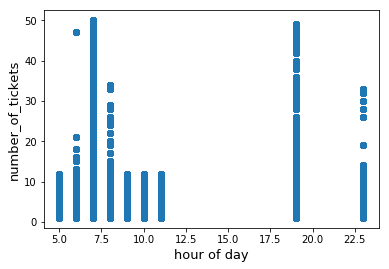

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['hour'], y = train['number_of_tickets'])
plt.ylabel('number_of_tickets', fontsize=13)
plt.xlabel('hour of day', fontsize=13)
plt.show()

### Target variable analysis

mean mu = 17.28 and stan_dev sigma = 12.38


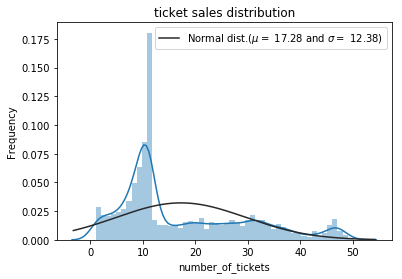

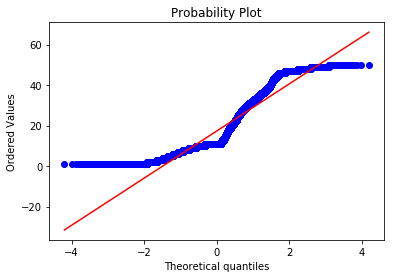

In [ ]:
sns.distplot(train['number_of_tickets'], fit=norm)
#getting fitted parameters used by the function
(mu, sigma) = norm.fit(train['number_of_tickets'])
print(f'mean mu = {mu:.2f} and stan_dev sigma = {sigma:.2f}')

#plotting the distribution
plt.legend([f'Normal dist.($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'],
           loc='best')
plt.ylabel('Frequency')
plt.title('ticket sales distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(train['number_of_tickets'], plot=plt)
plt.show()

### Scaling the target variable

In [ ]:
train['number_of_tickets'] = np.log1p(train['number_of_tickets'])

mean mu = 2.66 and stan_dev sigma = 0.74


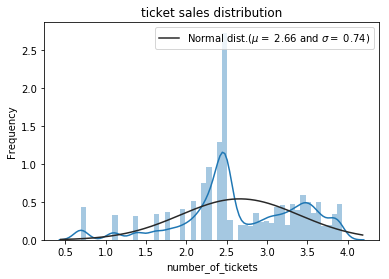

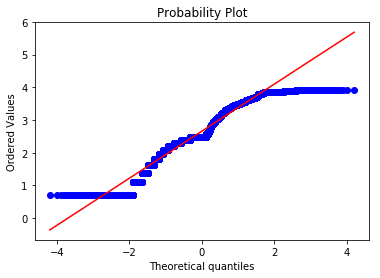

In [ ]:
#checking the new distribution
sns.distplot(train['number_of_tickets'], fit=norm)

#getting fitted parameters used by the function
(mu, sigma) = norm.fit(train['number_of_tickets'])
print(f'mean mu = {mu:.2f} and stan_dev sigma = {sigma:.2f}')

#plotting the distribution
plt.legend([f'Normal dist.($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'],
           loc='best')
plt.ylabel('Frequency')
plt.title('ticket sales distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(train['number_of_tickets'], plot=plt)
plt.show()

### Feature engineering

In [ ]:
#concatenating the train and test sets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.number_of_tickets.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['number_of_tickets'], axis=1, inplace=True)
print(f'dataset size: {all_data.shape}')

dataset size: (52756, 9)


In [ ]:
#checking for missing values
all_data.isnull().sum()

car_type        0
day             0
hour            0
max_capacity    0
travel_date     0
travel_from     0
travel_time     0
travel_to       0
year            0
dtype: int64

In [ ]:
#transforming variables that are categorical
all_data['year'] = all_data['year'].astype(str)
all_data['day'] = all_data['day'].astype(str)
all_data['hour'] = all_data['hour'].astype(str)

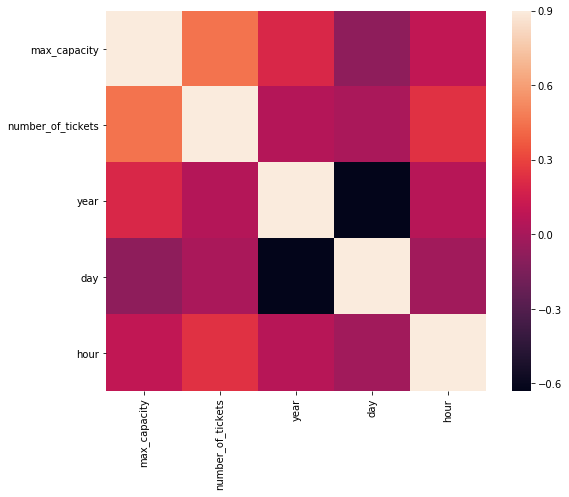

In [ ]:
#analysing data correlation with a correlation map
corrmat = train.corr()
plt.subplots(figsize=(9,7))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Label encoding some variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ('car_type', 'max_capacity', 'travel_from')
for col in columns:
    le = LabelEncoder()
    le.fit(list(all_data[col].values))
    all_data[col] = le.transform(list(all_data[col].values))
print(f'shape: {all_data.shape}')

shape: (52756, 9)


In [ ]:
#adding a new feature
tount = dict(all_data['day'].value_counts())
all_data['daily_travelers'] = all_data['day'].map(tount)

In [ ]:
all_data.drop(['travel_date', 'travel_time','travel_to'], axis=1, inplace=True)
print(f'dataset size: {all_data.shape}')

dataset size: (52756, 7)


In [ ]:
#getting dummy cat features
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(52756, 178)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]